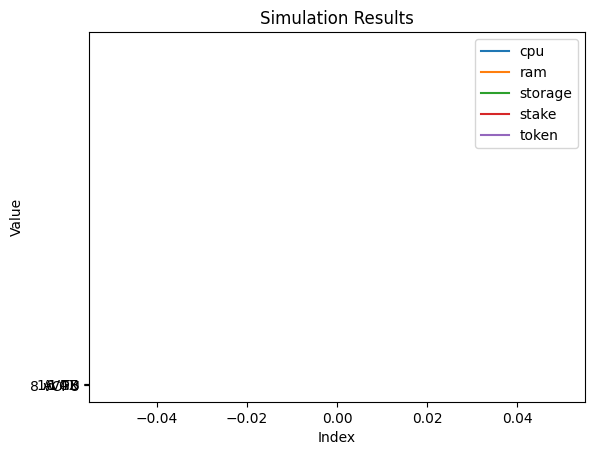

In [1]:
# Step 1: Import necessary modules and classes
import sys
import os
import json
import matplotlib.pyplot as plt

# Add the parent directory to the system path
sys.path.insert(0, os.path.abspath(os.path.join(os.getcwd(), '..')))


from simulation_engine.config.config_manager import ConfigManager
from simulation_engine.core.validator_config import ValidatorConfig
from simulation_engine.utils.visualization import plot_results

# Adjust the file path as needed based on your current working directory
config_file = '../examples/example_validator_config.json'
config = ConfigManager.load_config(config_file)


validator_config = ValidatorConfig(config['criteria'], config['min_stake'], config['staking_token'])
validators = validator_config.generate_validator_set()

plot_results(validators)
